# Fetch isotopic images

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from metaspace import SMInstance
import getpass
sm = SMInstance()
sm

This notebook illustrates how to pull ion images for annotations from [METASPACE](https://metaspace2020.eu).
It will obtain and display all the isotope images for a set of annotations.

### Enter your API Key (only required for private datasets)

To access private datasets on METASPACE, generate an API key from your [account page](https://metaspace2020.eu/user/me) and enter it when prompted below.
This step can be skipped for accessing public datasets.

In [ ]:
# This will prompt you to enter your API key if needed and it will save it to a config file.
# Note that API keys should be kept secret like passwords.
sm.save_login()

### Analysis

Whilst the API does support access by dataset name, it's most reliable to query using the dataset id. A quick hack to grab this through the web app is to filter the dataset then check the url:

![Imgur](https://i.imgur.com/KuAjPML.png)

The id for the selected dataset(s) can be copied from here
e.g.

ht&#8203;tp\.://metaspace2020.eu/#/annotations?ds=**2016-09-22_11h16m17s**&sort=-msm

In [2]:
ds = sm.dataset(id="2016-09-22_11h16m17s")
results = ds.results()
annotations = results[results.fdr <= 0.1][['msm']]
annotations.head()

,,msm
formula,adduct,
C40H80NO8P,+K,0.991456
C43H76NO7P,+Na,0.987877
C42H84NO8P,+K,0.987600
C37H71O8P,+K,0.987128
C44H86NO8P,+K,0.976368


### Download and plot all isotopic images for the first 5 annotations

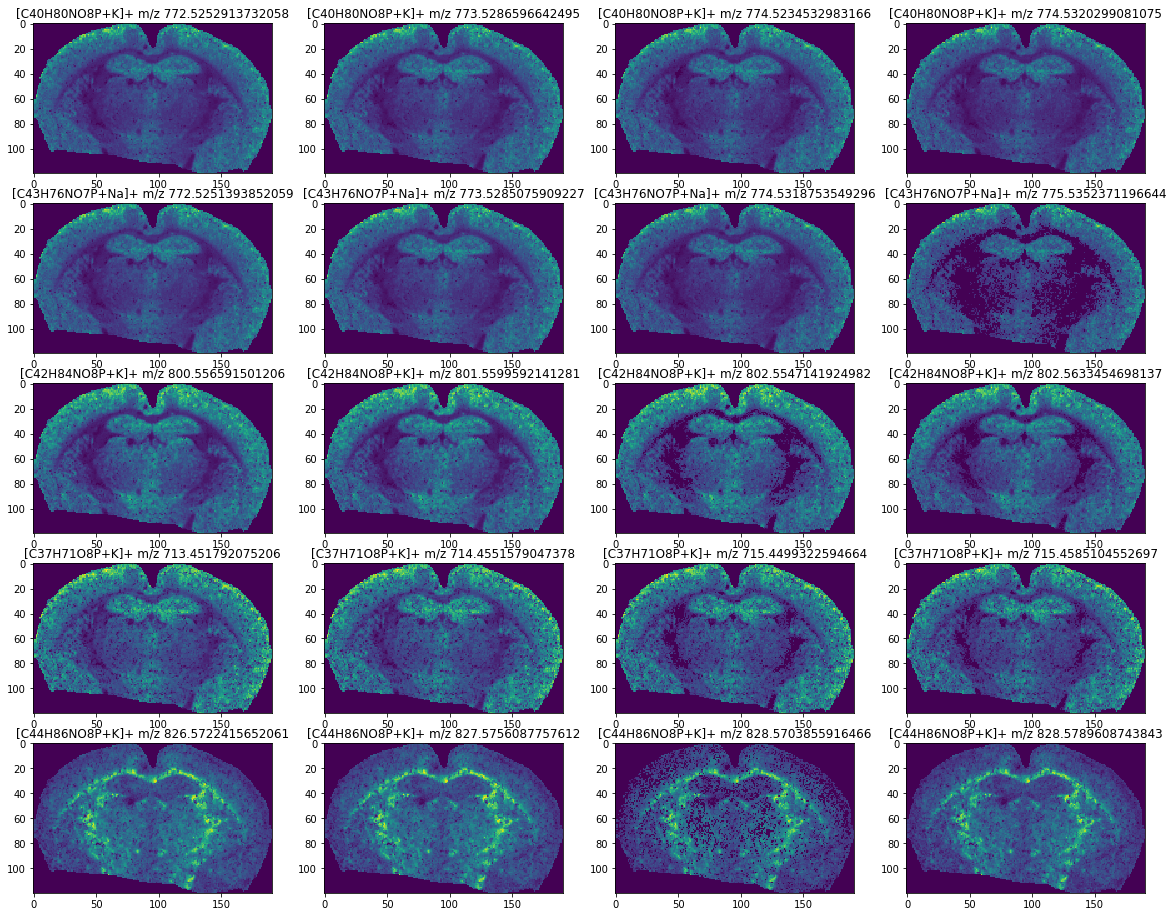

In [3]:
limit = 5 # number of annotations to get
plt.figure(figsize=(20, 16))
for ii in range(limit):
    row = results.iloc[ii]
    (sf, adduct) = row.name
    images = ds.isotope_images(sf, adduct)
    for j, im in enumerate(images):
        plt.subplot(limit, 4, ii * 4 + j + 1)
        plt.title("[{}{}]+ m/z {}".format(sf, adduct, images.peak(index=j)))
        plt.imshow(images[j], cmap='viridis')
plt.show()

### Bulk-download one image per annotation and calculate the pearson correlation between images

In [4]:
isotope_image_sets = ds.all_annotation_images(fdr=0.10, only_first_isotope=True, scale_intensity=False)

# Convert images into the format NumPy expects: a 2D array where each row 
# is one annotation's pixels / each column is one pixel across all annotations
images = np.array([imgs[0].flatten() for imgs in isotope_image_sets])
labels = [(imgs.formula, imgs.adduct) for imgs in isotope_image_sets]
corr = np.corrcoef(images)
corr_df = pd.DataFrame(corr, index=labels, columns=labels)
corr_df

,"(C40H80NO8P, +K)","(C43H76NO7P, +Na)","(C42H84NO8P, +K)","(C37H71O8P, +K)","(C44H86NO8P, +K)","(C41H83N2O6P, +K)","(C45H80NO7P, +Na)","(C40H80NO8P, +Na)","(C42H82NO8P, +K)","(C40H80NO8P, +H)",...,"(C20H38O2, +H)","(C43H84NO8P, +H)","(C42H78NO8P, +H)","(C44H82NO8P, +H)","(C43H87N2O6P, +K)","(C42H83O10P, +Na)","(C8H20NO6P, +K)","(C48H84NO8P, +K)","(C16H16O11S, +K)","(C45H78NO8P, +K)"
"(C40H80NO8P, +K)",1.000000,1.000000,0.952897,0.967237,0.245976,0.833225,0.952896,0.982682,0.848139,0.921046,...,-0.007426,0.851782,0.982674,0.933620,0.382377,0.952055,0.152810,0.490398,0.289137,0.636388
"(C43H76NO7P, +Na)",1.000000,1.000000,0.952897,0.967237,0.245976,0.833225,0.952896,0.982682,0.848139,0.921046,...,-0.007426,0.851782,0.982674,0.933620,0.382377,0.952055,0.152810,0.490398,0.289137,0.636388
"(C42H84NO8P, +K)",0.952897,0.952897,1.000000,0.928603,0.265837,0.769453,1.000000,0.958757,0.843311,0.878954,...,-0.004923,0.818077,0.958749,0.976383,0.477978,0.998177,0.155859,0.561101,0.287036,0.665877
"(C37H71O8P, +K)",0.967237,0.967237,0.928603,1.000000,0.311083,0.826645,0.928601,0.959579,0.874272,0.867523,...,-0.006511,0.879146,0.959580,0.900842,0.381378,0.929519,0.212115,0.543898,0.413908,0.725554
"(C44H86NO8P, +K)",0.245976,0.245976,0.265837,0.311083,1.000000,0.315141,0.265828,0.282098,0.663409,0.230023,...,0.008136,0.491154,0.282133,0.213727,0.259783,0.265818,0.740538,0.636748,0.721979,0.514660
"(C41H83N2O6P, +K)",0.833225,0.833225,0.769453,0.826645,0.315141,1.000000,0.769453,0.841931,0.799991,0.750975,...,-0.004867,0.801050,0.841924,0.760261,0.308824,0.766656,0.340360,0.448071,0.326168,0.593814
"(C45H80NO7P, +Na)",0.952896,0.952896,1.000000,0.928601,0.265828,0.769453,1.000000,0.958756,0.843308,0.878951,...,-0.004923,0.818067,0.958748,0.976380,0.477895,0.998177,0.155857,0.561080,0.287023,0.665875
"(C40H80NO8P, +Na)",0.982682,0.982682,0.958757,0.959579,0.282098,0.841931,0.958756,1.000000,0.856468,0.915175,...,-0.007160,0.859451,0.999993,0.955873,0.427682,0.957449,0.168905,0.517190,0.305991,0.645559
"(C42H82NO8P, +K)",0.848139,0.848139,0.843311,0.874272,0.663409,0.799991,0.843308,0.856468,1.000000,0.752610,...,0.000489,0.889056,0.856479,0.780084,0.430843,0.843408,0.501314,0.777492,0.593308,0.833599
"(C40H80NO8P, +H)",0.921046,0.921046,0.878954,0.867523,0.230023,0.750975,0.878951,0.915175,0.752610,1.000000,...,-0.000408,0.863759,0.915163,0.896570,0.369670,0.876900,0.058189,0.408694,0.193200,0.515406
